#  Walmart - Confidence Interval and CLT


## 1. DEFINITIONS OF THE PROBLEM STATEMENT AND ANALYSING BASIC METRICS ON DATA

## ##Probelm Definition

>  The Management team at Walmart Inc. wants to analyze the customer purchase
 behavior (specifically, purchase amount) against the customer’s gender and the var
ious other factors to help the business make better decisions. They want to understand
 if the spending habits differ between male and female customers: Do women spend
 more on Black Friday than men? (Assume 50 million customers are male and
 50 million are female).

## ##Dataset

>  The company collected the **transactional data** of customers who purchased products from the Walmart Stores **during Black Friday**.

### ##Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli,binom,norm,expon,geom,poisson,lognorm
import math
import io

### ##Data Importing

In [2]:
file_path = r'C:\Git_Projects\Wallmart_Data_Analysis\walmart_data.csv'
walmart = pd.read_csv(file_path)

In [3]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### ##Basic Metrics

In [4]:
walmart.shape

(550068, 10)

In [5]:
walmart.ndim

2

In [6]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
walmart.describe(include= 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


### ##Conversion of Columns to Category

In [8]:
col_cat = ['Occupation', 'Marital_Status', 'Product_Category']
walmart[col_cat] = walmart[col_cat].astype('object')

In [9]:
walmart.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

### ##Unique values in Categorical Columns

In [10]:
for i in  walmart.columns:
    if i in ['User_ID','Product_ID', 'Purchase']:
        continue
    print(i, sorted(walmart[i].unique())," ", sep='\n')


Gender
['F', 'M']
 
Age
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
 
Occupation
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
 
City_Category
['A', 'B', 'C']
 
Stay_In_Current_City_Years
['0', '1', '2', '3', '4+']
 
Marital_Status
[0, 1]
 
Product_Category
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
 


### ##Purchase range

In [11]:
print(f'The Purchase amount of the Transactions are in between: {walmart['Purchase'].min(), walmart['Purchase'].max()}')

The Purchase amount of the Transactions are in between: (np.int64(12), np.int64(23961))


Observations
- The dataset is collected with customers over age range from 0-55+
- The data is collected over 2 different cities
- Customers have a varied backgrounds with 21 unique occupations.
- There are 20 diffrrent product categories.

## 2. Detect Null values & Outliers

In [24]:
walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Observations
- There are no null values present in the dataset.

In [25]:
walmart.describe(include= 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


Observations
- The mean Purchase value of the transactions is $9263.96.
- The the Median of the Purchase values is $8047.
- There a considerable difference between the Mean and Median values is $1,216.96.
- This is an indication that there are outliers above the upper whisker are more and they are influencing the MEAN value of the Purchase.

#### ##Outlier check

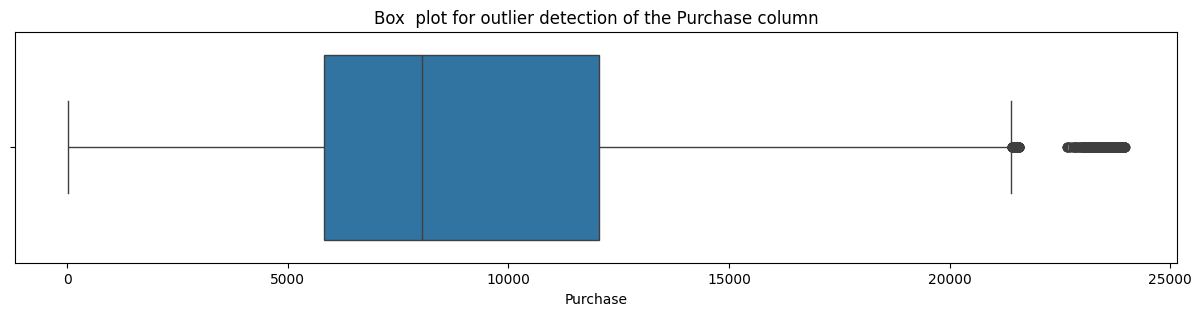

In [15]:
plt.figure(figsize=(15,3))
sns.boxplot(data=walmart, x=walmart['Purchase'], orient='h')
plt.title('Box  plot for outlier detection of the Purchase column')
plt.show()

##Finding the outliers

In [26]:
iqr = walmart['Purchase'].quantile(0.75) - walmart['Purchase'].quantile(0.25)
upper_whisker = walmart['Purchase'].quantile(0.75) + (1.5) * iqr
lower_whisker = walmart['Purchase'].quantile(0.25) -(1.5) * iqr
outliers = walmart['Purchase'][(walmart['Purchase'] > upper_whisker) | (walmart['Purchase'] < lower_whisker)]

print(f'Upper whisker or 75th percentile of the Purchase column is {upper_whisker}')
print(f'Lower whisker or 25th percentile value of the Purchase is {lower_whisker}')
print(f'Inter Quartile Range = {iqr}')
print('Number of outliers =', len(outliers))
print(f'Max value of the Outliers = {outliers.max()}')
print(f'Min value of the outliers = {outliers.min()}')

Upper whisker or 75th percentile of the Purchase column is 21400.5
Lower whisker or 25th percentile value of the Purchase is -3523.5
Inter Quartile Range = 6231.0
Number of outliers = 2677
Max value of the Outliers = 23961
Min value of the outliers = 21401


Observations:
- The Upper whisker value is 21400.5 and lower whisker value is $-3523.5 which is to be considered as 0. 
- The number of oultier are 2677, The number is fairly large therefore pon deletion of these may result in significant loss of data. Hence the analysis here is done without any modifications to the outliers.

## 3. Data Exploration - Non Graphicla and Visual Analysis

### 3.1 Non-Graphical Analysis

#### ##No of transactions per each Categorical column

In [20]:
cat_col = walmart.select_dtypes(include='object').columns.to_list()
cat_col

['Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category']

In [ ]:
cat_col.remove('Product_ID') # Removing Product_ID from the list for calculating the number of transactions as it would hold no inference
cat_col

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category']

In [23]:

for i in cat_col:
    print(f'Number of columns in {i} column:', end='\n')
    print(walmart[i].value_counts(), end='\n\n')

Number of columns in Gender column:
Gender
M    414259
F    135809
Name: count, dtype: int64

Number of columns in Age column:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

Number of columns in Occupation column:
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

Number of columns in City_Category column:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

Number of columns in Stay_In_Current_City_Years column:
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

Number of columns in Marital_Status column:
Marital_Status
0    324731
1    225337
Name: count, dtype: in

Observations
> As per the Number of transactions
- Male : Female = 414259 : 135809 which is approximatly 75% : 25%.
- Maximum number of transactions are done by the age group = 26-35
- Top 5 occupations = 4,0,7,1,17
- City B has highest number of transactions.
- Maximum number of transactions are made by customers who stayed in the current city for 1 year.
- Top 5 Product Categories are 5,1,8,77,2.

#### ##Cross Tab analysis

Comparison between City Cat and Gender

In [38]:
df = pd.DataFrame(walmart.groupby(["Gender"])[["Purchase"]].sum())
df['%_ of_total'] = (df['Purchase']/df['Purchase'].sum()) * 100
df

,Purchase,%_ of_total
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


Observations
- It can be observed that Males spend about 76% of the total purchase value.
- Males spent more amount on the Black Friday.

Comparison between Age group and Purchase Value

In [39]:
df = pd.DataFrame(walmart.groupby(["Age"])[["Purchase"]].sum())
df["percentage"] = df["Purchase"]/df["Purchase"].sum()*100
df

,Purchase,percentage
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


Observations
- 26-35 age group spend highest amount of the Purchase value when compared to the other age groups.
- 36-45 age group spend the second highest amount.
- Therefore it can be said that the **customers of the the age 26-45 are likely to spend more amount when compared to other age groups**.

Comparision between marital status and total purchase amount

In [40]:
df = pd.DataFrame(walmart.groupby(["Marital_Status"])[["Purchase"]].sum())
df["percentage"] = df["Purchase"]/df["Purchase"].sum()*100
df

,Purchase,percentage
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


Observations
- The total purchase amount of the Married vs UnMarried is 41% : 59%.
- They are almost neck to neck, with slight inclination towards UnMarried customers spending more amount.

#### ##Summary Statistics

In [55]:
gender_sum = walmart.groupby('Gender')['Purchase'].describe()
print(f'Gender based summary:\n {gender_sum}')

age_sum = walmart.groupby('Age')['Purchase'].describe()
print(f'Age based summary:\n {age_sum}')

city_sum = walmart.groupby('City_Category')['Purchase'].describe()
print(f'City based summary: \n {city_sum}')

Gender based summary:
            count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0  
Age based summary:
           count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  1

#### ##Marital Status wrt Gender on Spending

In [61]:
# Finding the Average
mar_gen_mean = walmart.groupby(['Marital_Status', 'Gender'])['Purchase'].mean()
# Finding the Median
mar_gen_med = walmart.groupby(['Marital_Status', 'Gender'])['Purchase'].quantile(0.5)

print(f'Average Purchase by  Marital Status and Gender:\n {mar_gen_mean} \n\nMedian of the Purchase by Marital Status and Gender:\n {mar_gen_med}')

Average Purchase by  Marital Status and Gender:
 Marital_Status  Gender
0               F         8679.845815
                M         9453.756740
1               F         8810.249789
                M         9413.817605
Name: Purchase, dtype: float64 

Median of the Purchase by Marital Status and Gender:
 Marital_Status  Gender
0               F         7895.0
                M         8101.0
1               F         7939.0
                M         8094.0
Name: Purchase, dtype: float64


Observations:
- UnMarried Males spend the highest Average Purchase amount.
- 50% of the UnMarried Males spend about $8101 which is the highest of all the categories.

#### ##Product Category trends wrt Gender on Spending

In [73]:
# Mean purchase for each ProductCategory
product_category_means = walmart.groupby('Product_Category')['Purchase'].mean()

# Sort by the mean purchase and get the top 5 categories
top_5_categories = product_category_means.nlargest(5).index
print(f'Top 5 Product Categories wrt average Purchase amount: {top_5_categories.to_list()}')

# Filter the original data to include only the top 5 product categories
top_5_data = walmart[walmart['Product_Category'].isin(top_5_categories)]

# Calculate the mean purchase amount for each gender within these top categories
top_5_analysis = top_5_data.groupby(['Product_Category', 'Gender'])['Purchase'].mean().reset_index()

print("\nTop 5 Product Categories Based on Mean Purchase, Segregated by Gender:\n", top_5_analysis)


Top 5 Product Categories wrt average Purchase amount: [10, 7, 6, 9, 15]

Top 5 Product Categories Based on Mean Purchase, Segregated by Gender:
    Product_Category Gender      Purchase
0                 6      F  15596.428164
1                 6      M  15907.851009
2                 7      F  16394.853659
3                 7      M  16355.789777
4                 9      F  15724.314286
5                 9      M  15498.888235
6                10      F  19692.076592
7                10      M  19670.731264
8                15      F  14695.326960
9                15      M  14797.431350


Observations
- The highest average spend is recorded for the Product Category 10 is spent by Males.
- The next highest is recorded for the Product Category 10 is spent by Females.

### 3.2 Graphical Analysis

#### ##Bivariate Analysis

> Here we melt the data to get the Categorical columns and number of Transactions per each variable in the respective column.

> First we melt the dataset, which gives the Transaction wrt each Categorical variable, then groupby is applied on it melted data wrt the the categorical col and the values. 

> Then we perform count operation on it which counts the rows respective to the variable in the categorical column.

In [79]:
walmart[cat_col].melt().groupby(['variable', 'value'])[['value']].count()

value
variable                   value        
Age                        0-17    15102
                           18-25   99660
                           26-35  219587
                           36-45  110013
                           46-50   45701
                           51-55   38501
                           55+     21504
City_Category              A      147720
                           B      231173
                           C      171175
Gender                     F      135809
                           M      414259
Marital_Status             0      324731
                           1      225337
Occupation                 0       69638
                           1       47426
                           2       26588
                           3       17650
                           4       72308
                           5       12177
                           6       20355
                           7       59133
                           8        1546
                           9        6291
                           10      12930
                           11      11586
                           12      31179
                           13       7728
                           14      27309
                           15      12165
                           16      25371
                           17      40043
                           18       6622
                           19       8461
                           20      33562
Product_Category           1      140378
                           2       23864
                           3       20213
                           4       11753
                           5      150933
                           6       20466
                           7        3721
                           8      113925
                           9         410
                           10       5125
                           11      24287
                           12       3947
                           13       5549
                           14       1523
                           15       6290
                           16       9828
                           17        578
                           18       3125
                           19       1603
                           20       2550
Stay_In_Current_City_Years 0       74398
                           1      193821
                           2      101838
                           3       95285
                           4+      84726

In [90]:
Cat_col_group = walmart[cat_col].melt().groupby(['variable', 'value']).size().div(len(walmart)) * 100
Cat_col_group = Cat_col_group.reset_index(name= '%_of_total')
Cat_col_group.columns = ['Categorical_column', 'Categories', '%_of_total']
Cat_col_group.head(5)

,Categorical_column,Categories,%_of_total
0,Age,0-17,2.745479
1,Age,18-25,18.117760
2,Age,26-35,39.919974
3,Age,36-45,19.999891
4,Age,46-50,8.308246


Plotting the graphs

C:\Users\sreem\AppData\Local\Temp\ipykernel_8988\3894755847.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=data['Categories'], y=data['%_of_total'], order=data.sort_values(by='%_of_total', ascending=False).Categories, palette='Set3')
C:\Users\sreem\AppData\Local\Temp\ipykernel_8988\3894755847.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=data['Categories'], y=data['%_of_total'], order=data.sort_values(by='%_of_total', ascending=False).Categories, palette='Set3')
C:\Users\sreem\AppData\Local\Temp\ipykernel_8988\3894755847.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

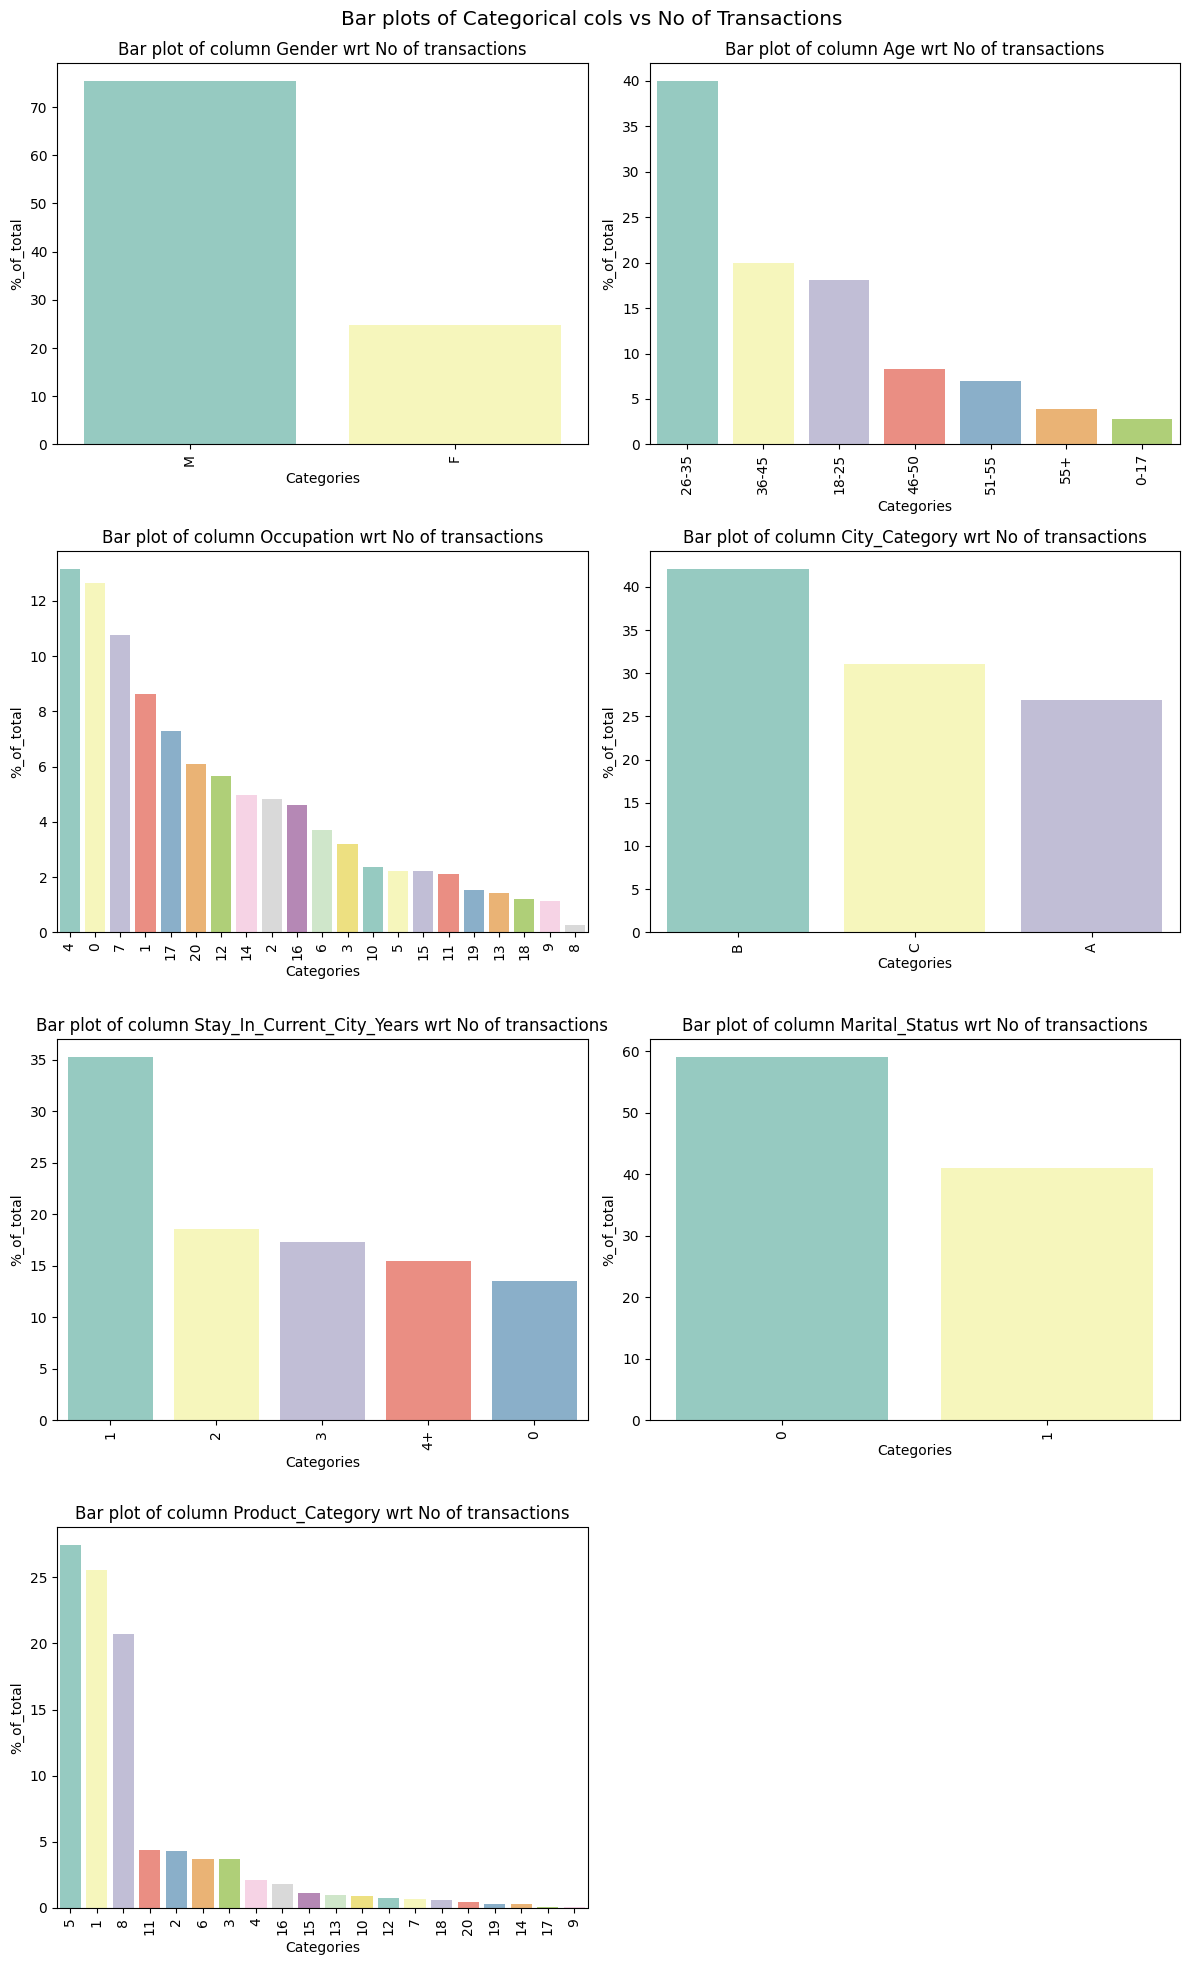

In [94]:
plt.figure(figsize=(12,20))
plt.suptitle('Bar plots of Categorical cols vs No of Transactions \n', fontsize='x-large')
k=1
for i in cat_col:
    plt.subplot(4,2,k)
    plt.title(f'Bar plot of column {i} wrt No of transactions')
    data = Cat_col_group[Cat_col_group['Categorical_column'] == i]
    sns.barplot(data=data, x=data['Categories'], y=data['%_of_total'], order=data.sort_values(by='%_of_total', ascending=False).Categories, palette='Set3')
    plt.xticks(rotation =90)
    k =k+1
plt.tight_layout()
plt.show()

Observations
- Product Category- 1,5,8 have high purchasing frequencies.
- Occupation Category- 4, 0 ,7, 1, 17, 20 occupy approxmately 50% of dataset.
- City B has maximum no of tramsactions.
- Customers that stayed in the city for 1 year spent most amount when compared to others.

#### ##Distribution of the Purchase column.

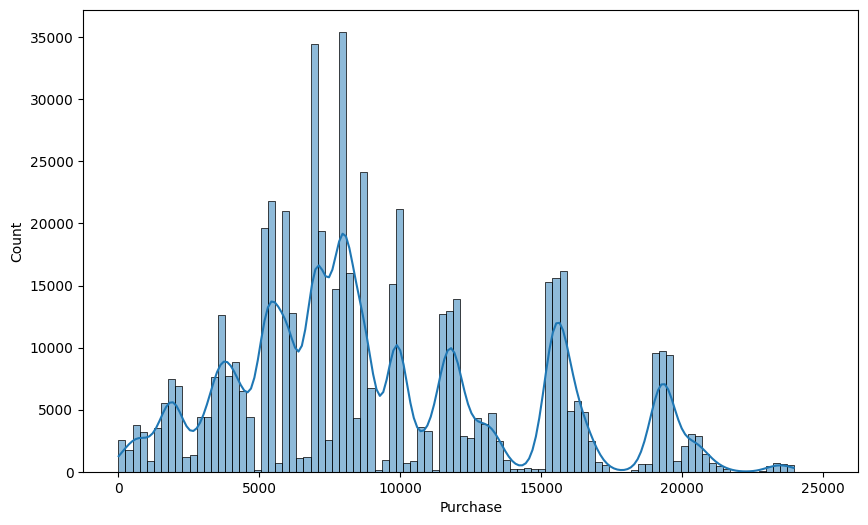

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(data=walmart, x='Purchase', kde=True,bins = np.linspace(0,25000,100))
plt.show()

Observations
- Most of the transactions are ranging from 5000$ to 10000$.
- The data is multi-modal, which indicates there are multiple peaks.

#### ##Multi variate plots wrt Gender and Purchase

> Here we try to plot diffrent categorical columns data based on the Gender and the Purchase amount. The x axis will be the gender and the Y axis will the Purchase value or the amount spent by different column by Male and Female customers. Here the differentiations wrt each plot lies in the Legend.

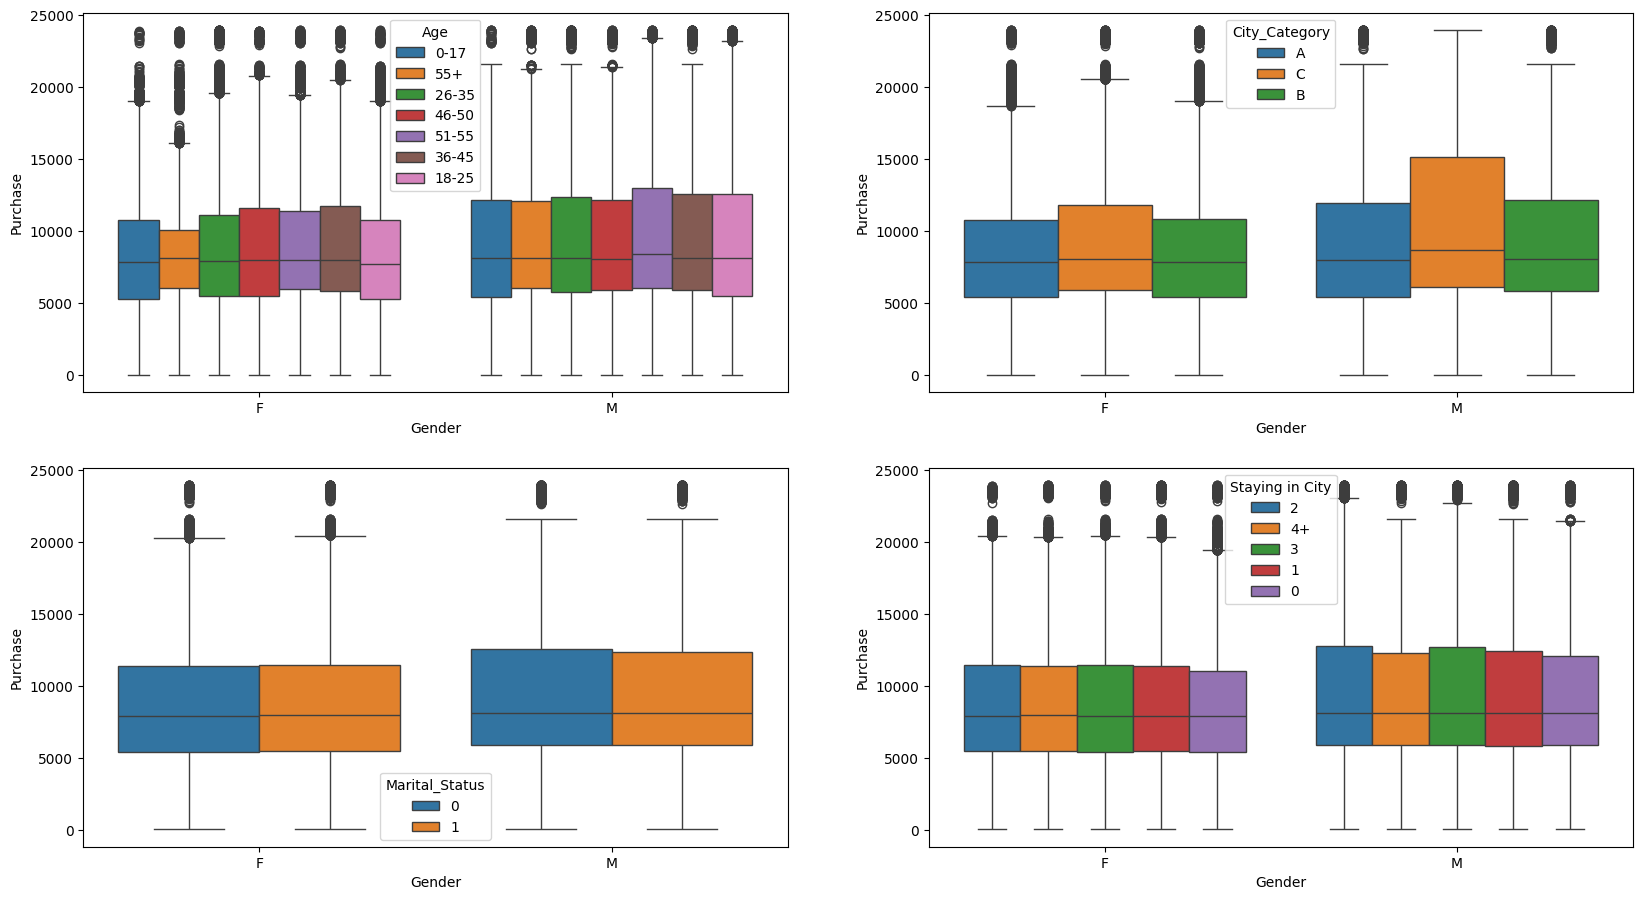

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='City_Category',ax=axs[0,1])
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Marital_Status',ax=axs[1,0])
sns.boxplot(data=walmart, y='Purchase', x='Gender',hue='Stay_In_Current_City_Years', ax=axs[1,1])
axs[1,1].legend(loc='best',title="Staying in City")
plt.show()

Observations
- For Male and Female, With respect to Age Bins, Median Purchase values are almost similar.
- For Male and Female, With respect to Marital Status, Median Purchase values are almost similar.
- For Male and Female, With respect to City Category, slightly Category B Median Purchase value is higher for both female and male
- For Male and Female, With respect to Stay in city column, Median Purchase values are almost similar

#### ##Pair plot

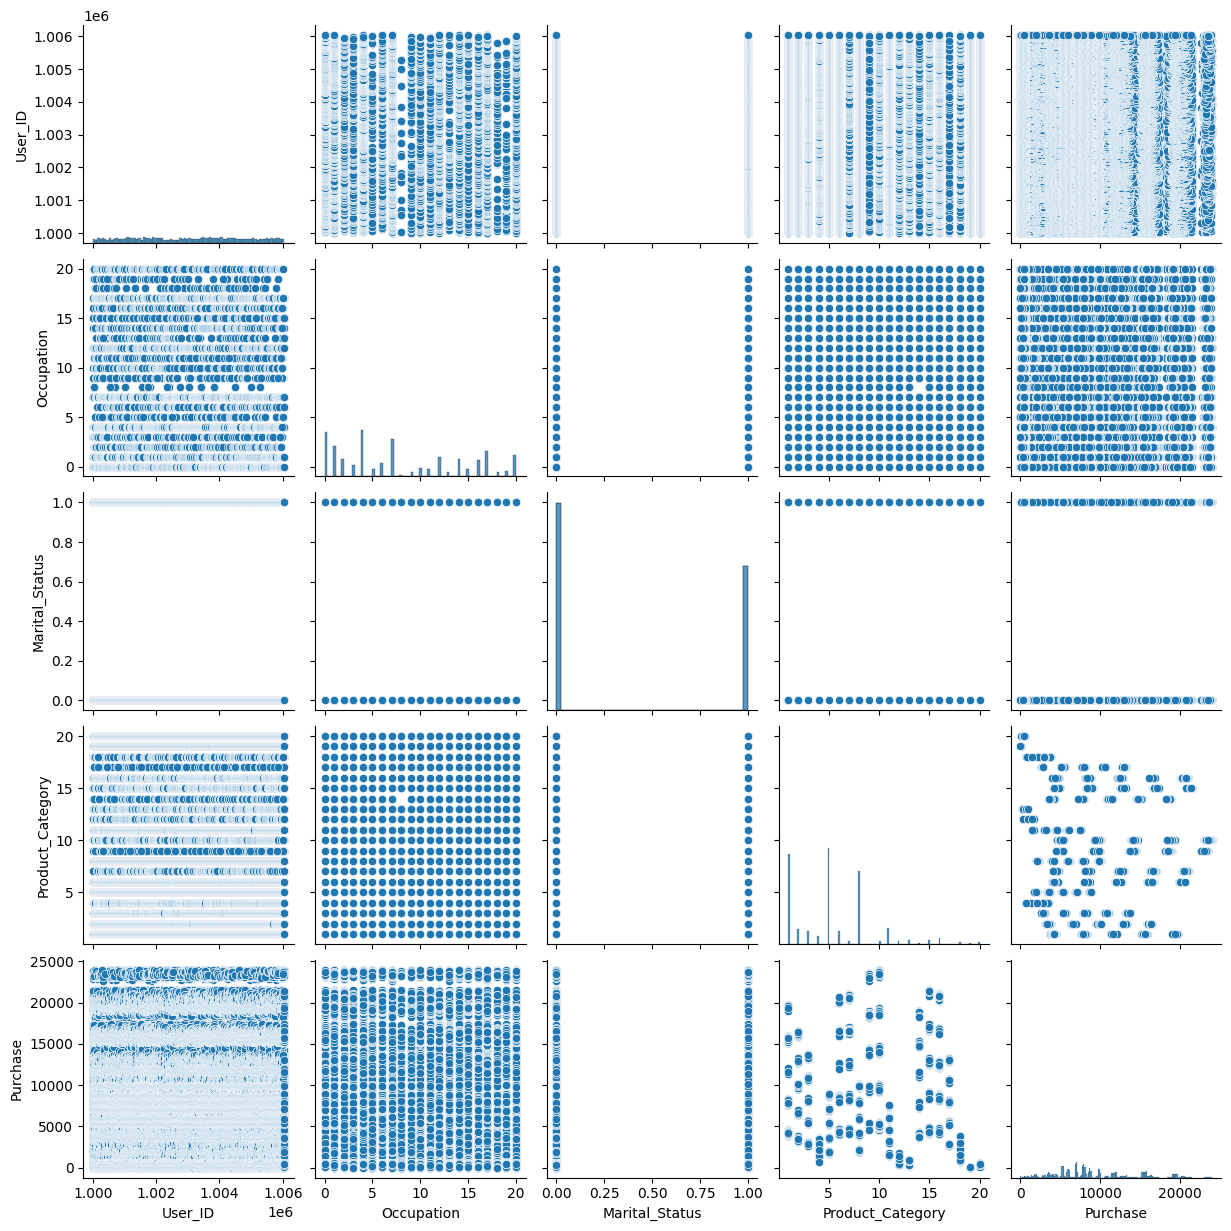

In [96]:
sns.pairplot(walmart)

## 4. Application of Central Limit Theorem and obtaining the Confidence Intervals

### Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
> The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

#### ##Average Purcahse values of users based on the Gender

In [14]:
avg_spend_gender = walmart.groupby(['User_ID','Gender'])[['Purchase']].mean()
avg_spend_gender

,,Purchase
User_ID,Gender,
1000001,F,9545.514286
1000002,M,10525.610390
1000003,M,11780.517241
1000004,M,14747.714286
1000005,M,7745.292453
...,...,...
1006036,F,8007.894942
1006037,F,9176.540984
1006038,F,7502.833333


Observations
- There are about 5891 unique transactions done on the Black Friday sale.
- The rows reducing to 5891 indicates that multiple items being bought by a customer (with same User_ID).

In [15]:
avg_spend_gender = walmart.groupby(['User_ID','Gender'])[['Purchase']].mean()
avg_spend_gender = avg_spend_gender.reset_index()
avg_spend_gender['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

Observations
- Out of 5891 unique transactions, 4255 are made by Male customers and 1666 are made by Female customers.

#### ##Plotting the Avg Spend of Male and Female Customers per Transaction.

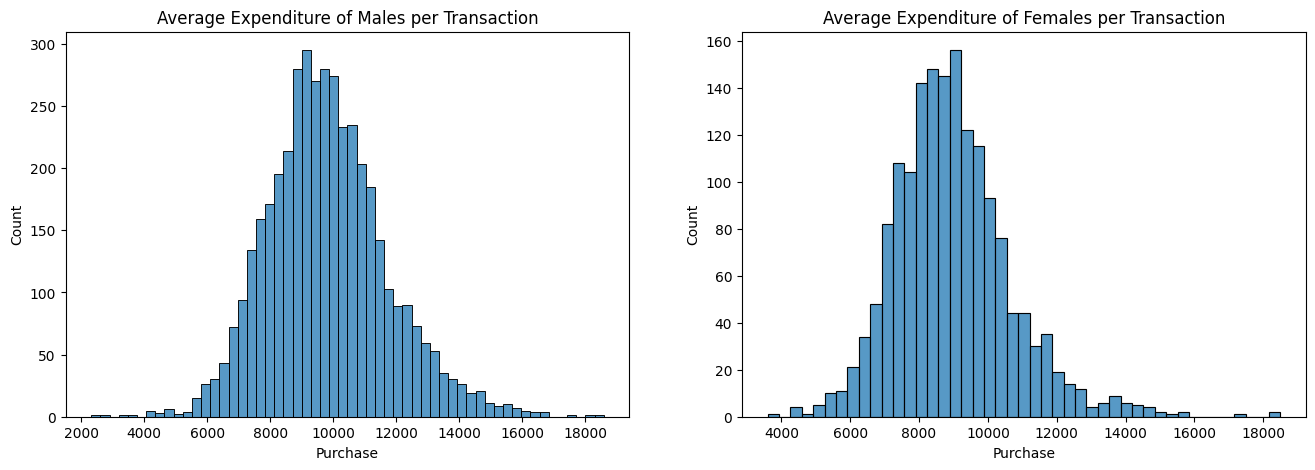

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=avg_spend_gender[avg_spend_gender['Gender']=='M']['Purchase'],ax=axs[0]).set_title('Average Expenditure of Males per Transaction')
sns.histplot(data=avg_spend_gender[avg_spend_gender['Gender']=='F']['Purchase'], ax=axs[1]).set_title('Average Expenditure of Females per Transaction')
plt.show()

Seperating the Male and Female Data for ease of access

In [20]:
avg_spend_male = avg_spend_gender[avg_spend_gender['Gender']=='M']
avg_spend_female = avg_spend_gender[avg_spend_gender['Gender']=='F']

avg_spend_male.head(10), avg_spend_female.head(10)

(    User_ID Gender      Purchase
 1   1000002      M  10525.610390
 2   1000003      M  11780.517241
 3   1000004      M  14747.714286
 4   1000005      M   7745.292453
 6   1000007      M  13804.000000
 7   1000008      M  10345.363636
 8   1000009      M  10243.086207
 11  1000012      M  10981.909091
 12  1000013      M  11898.783333
 13  1000014      M   9817.615385,
     User_ID Gender      Purchase
 0   1000001      F   9545.514286
 5   1000006      F   8083.617021
 9   1000010      F   9728.744395
 10  1000011      F   7957.471429
 15  1000016      F   6840.454545
 17  1000018      F  10994.705556
 23  1000024      F   9362.324675
 27  1000028      F   9062.456140
 29  1000030      F   8438.193548
 31  1000032      F   9543.708333)

#### ##Using Bootstrap method to create samples from the Male and Female data above

> From the data seperated of Male and Female customers from the Dataset. We now will create samples for testing using the **BootStrap Method**.

> Bootstrap Method - It is generally used when the samples are to be drawn from the data available. It is process of randomly choosing the values from the already existing dataset/data to create samples of varying sizes for further analysis and testing.

> Here from the available data of the **Average expenditures of Male and Female customers** we draw samples of diffrent sizes to Estimate the Population Mean and Confidence Inervals.

In [ ]:
# Creating a sample of size 1000
sample = 1000
avg_spend_Unmarried=[]
avg_spend_sam_f=[]

for i in range(sample):
    m = avg_spend_male.sample(n=sample, replace=True)['Purchase'].mean()
    f = avg_spend_female.sample(n=sample, replace=True)['Purchase'].mean()
    avg_spend_Unmarried.append(m)
    avg_spend_sam_f.append(f)

Plotting the graphs of the **Sample Means of Male and Female customers** drawn from the actual data

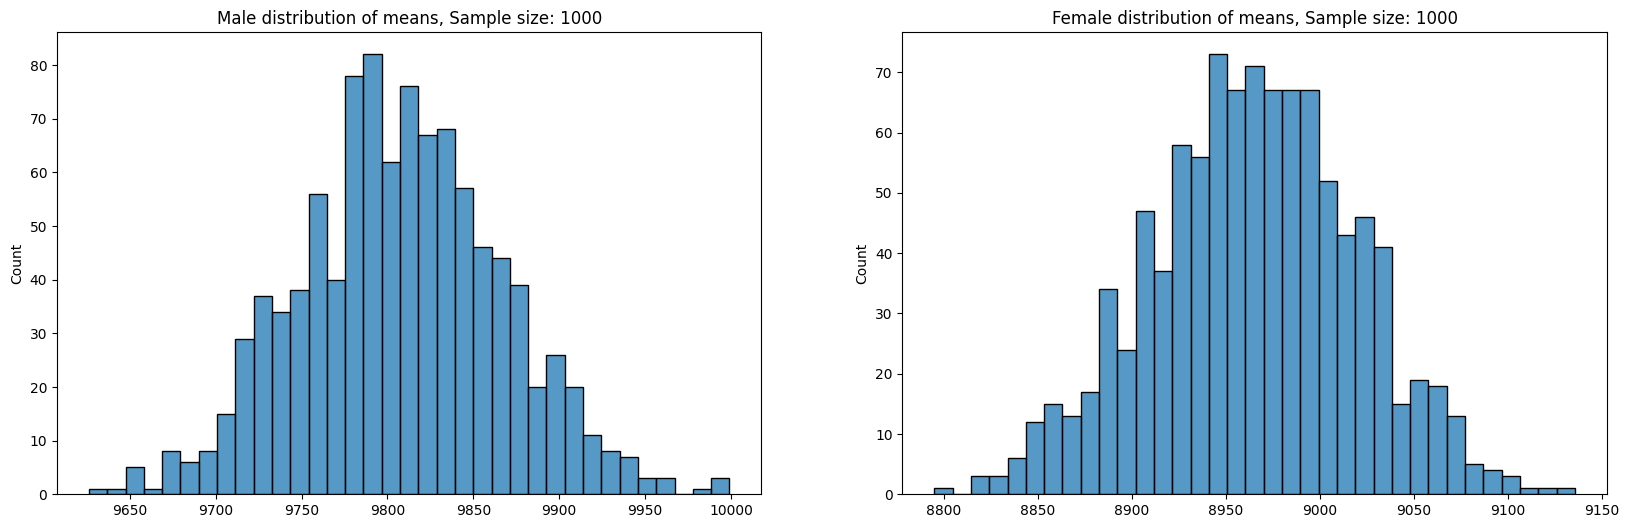

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.histplot(avg_spend_Unmarried, bins=35, ax=axis[0])
sns.histplot(avg_spend_sam_f, bins=35, ax=axis[1])
axis[0].set_title("Male distribution of means, Sample size: 1000")
axis[1].set_title("Female distribution of means, Sample size: 1000")
plt.show()

#### ##Varying the sample sizes to observe the distributions change

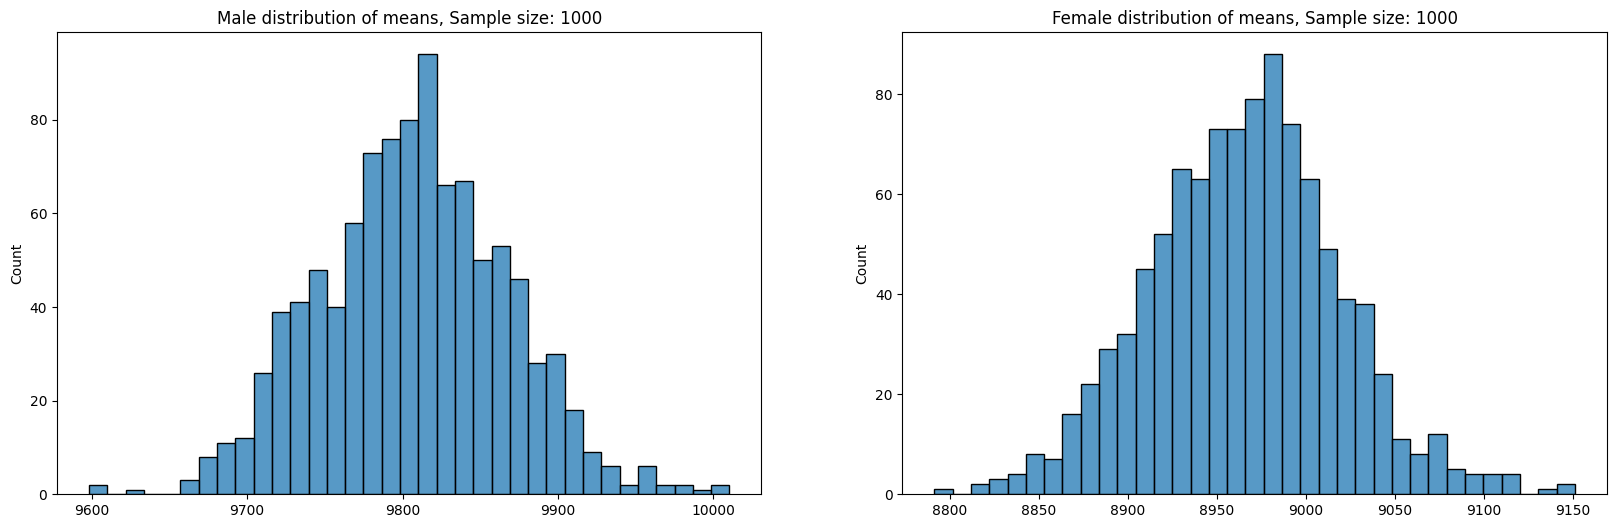

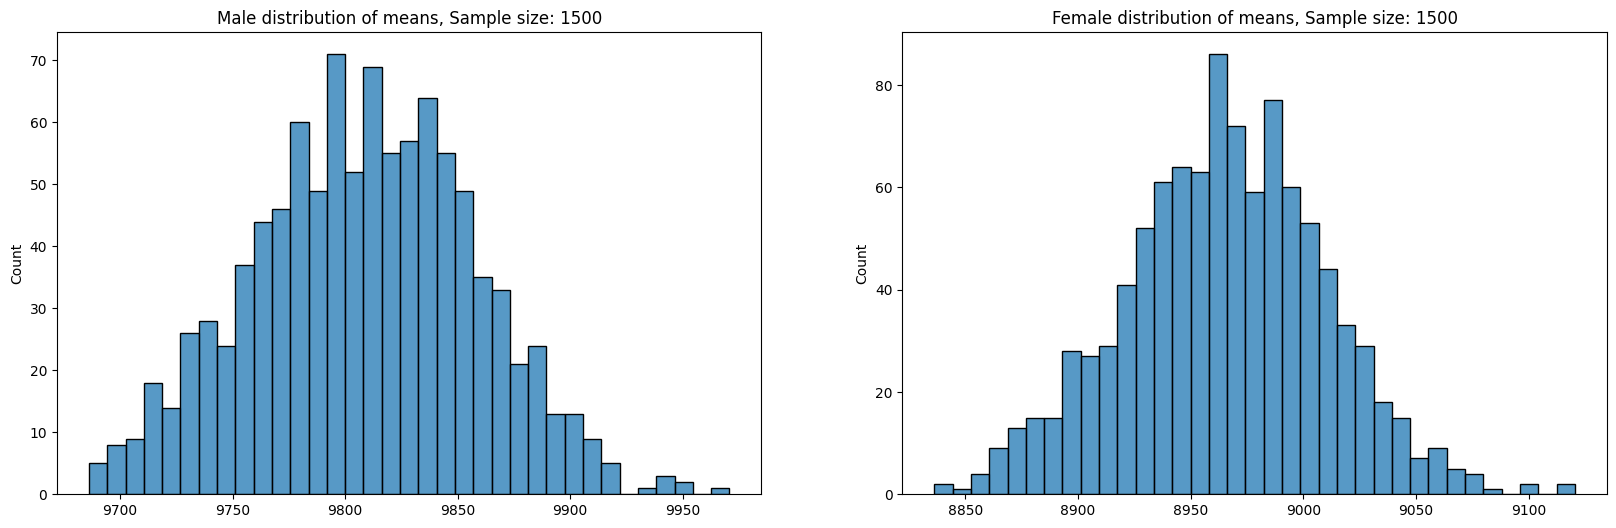

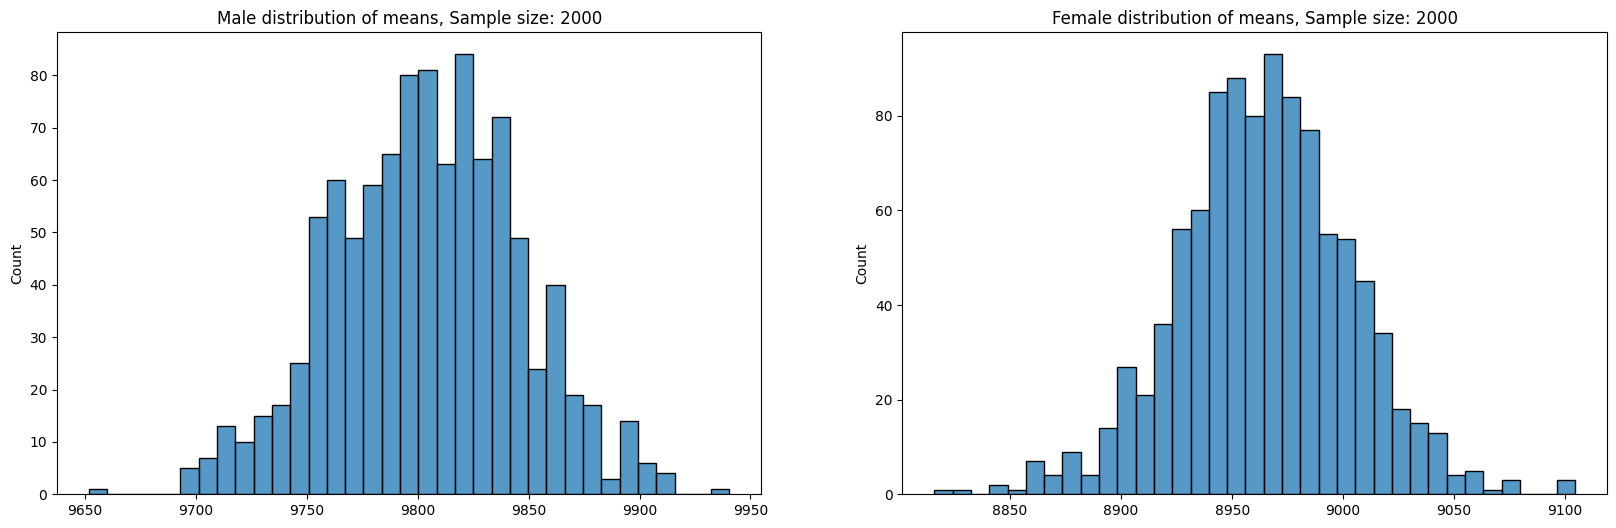

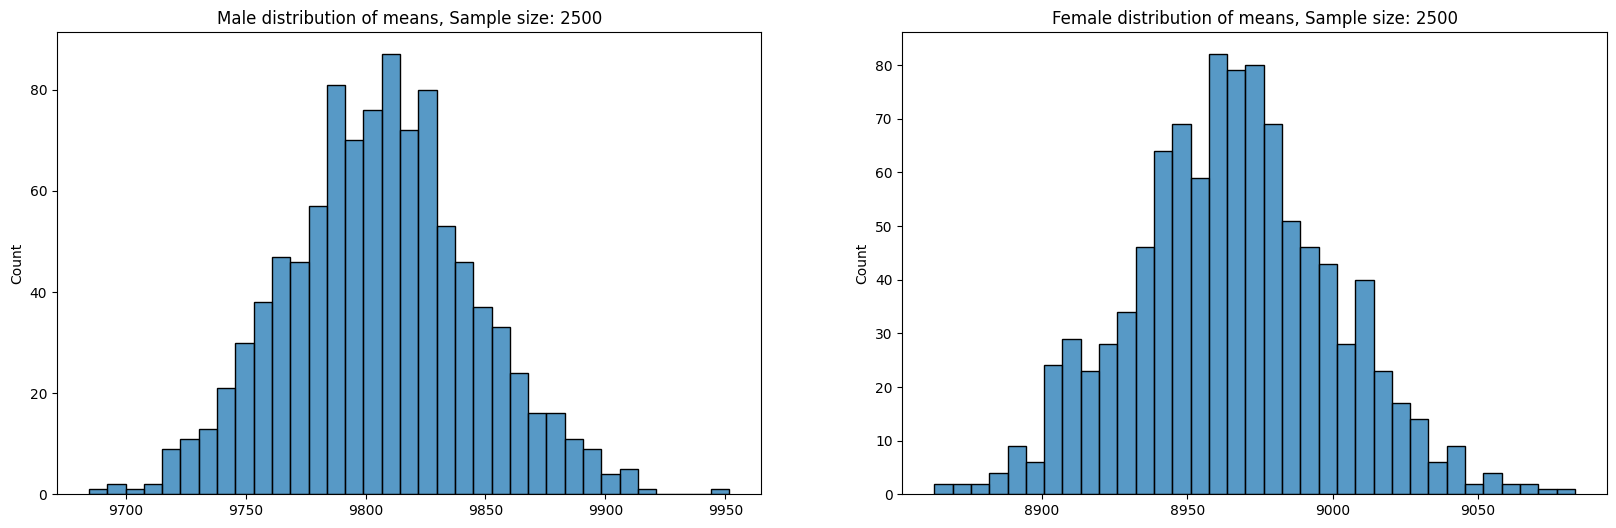

In [33]:
sample_size_range = np.arange(1000,3000,500)
num_repitions = 1000

for sample_size in sample_size_range:
    avg_male_means = []
    avg_female_means = []
    for i in range(num_repitions):
        m = avg_spend_male.sample(sample_size,replace=True)['Purchase'].mean()
        f = avg_spend_female.sample(sample_size,replace=True)['Purchase'].mean()
        avg_male_means.append(m)
        avg_female_means.append(f)
 
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    sns.histplot(avg_male_means, bins=35, ax=axis[0])
    sns.histplot(avg_female_means, bins=35, ax=axis[1])
    axis[0].set_title("Male distribution of means, Sample size: {}".format(sample_size))
    axis[1].set_title("Female distribution of means, Sample size: {}".format(sample_size))
    plt.show()


#### ##Calculating the CI with 90%, 95%,99% of confidence and with varying sample sizes for Gender vs Purchase.

In [ ]:
# Creating a sample of size 1000
sample = 1000
avg_spend_Unmarried=[]
avg_spend_sam_f=[]

for i in range(sample):
    m = avg_spend_male.sample(n=sample, replace=True)['Purchase'].mean()
    f = avg_spend_female.sample(n=sample, replace=True)['Purchase'].mean()
    avg_spend_sam_m.append(m)
    avg_spend_sam_f.append(f)

In [ ]:
# Calculating Z values for 90%, 95%, 99% confidence
z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

L = [z90,z95,z99]
P = [90,95,99]
k = 0



for i in L:
    # Sample Means
    sample_mean_m = np.mean(avg_spend_sam_m)
    sample_mean_f = np.mean(avg_spend_sam_f)

    # Sample Std. deviation
    sample_std_m = pd.Series(avg_spend_sam_m).std()
    sample_std_f = pd.Series(avg_spend_sam_f).std()

    # Sample Std. Error
    sam_std_error_m = sample_std_m/(np.sqrt(sample))
    sam_std_error_f = sample_std_f/(np.sqrt(sample))
    
    # Upper limits of CI
    Upper_lim_m = sample_mean_m + i * sam_std_error_m
    Upper_lim_f = sample_mean_f + i * sam_std_error_f

    # Lower limits of CI
    Lower_lim_m = sample_mean_m - i * sam_std_error_m
    Lower_lim_f = sample_mean_f - i * sam_std_error_f
    
    # CI of Males and Females
    Male_avg_spend_CI = [Lower_lim_m, Upper_lim_m]
    Female_avg_spend_CI = [Lower_lim_f, Upper_lim_f]

    print(f'For {P[k]}% CI', end= '\n\n')
    k=k+1

    print(f"Population avg spend for Male = {avg_spend_male['Purchase'].mean():.2f}")
    print(f"Population avg spend for Females = {avg_spend_female['Purchase'].mean():.2f}\n")

    print(f"Sample avg spend of Male = {np.mean(avg_spend_sam_m):.2f}")
    print(f"Sample avg spend of Female = {np.mean(avg_spend_sam_f):.2f}\n")

    print(f'Sample standard deviation of the Male avg spend = {sample_std_m:.2f}')
    print(f'Sample standard deviation of the Female avg spend = {sample_std_f:.2f}\n')

    print(f'Sample standard error of the Male avg spend = {sam_std_error_m:.2f}')
    print(f'Sample standard error of the Female avg spend = {sam_std_error_f:.2f}\n')

    print(f'CI of avg spend for Males = {[float(x) for x in Male_avg_spend_CI]}')
    print(f'CI of avg spend for Females = {[float(x) for x in Female_avg_spend_CI]}', end='\n\n')
    




For 90% CI

Population avg spend for Male = 9806.87
Population avg spend for Females = 8965.20

Sample avg spend of Male = 9808.19
Sample avg spend of Female = 8966.55

Sample standard deviation of the Male avg spend = 60.23
Sample standard deviation of the Female avg spend = 51.43

Sample standard error of the Male avg spend = 1.90
Sample standard error of the Female avg spend = 1.63

CI of avg spend for Males = [9805.052647300408, 9811.318316520114]
CI of avg spend for Females = [8963.876212973575, 8969.226051973406]

For 95% CI

Population avg spend for Male = 9806.87
Population avg spend for Females = 8965.20

Sample avg spend of Male = 9808.19
Sample avg spend of Female = 8966.55

Sample standard deviation of the Male avg spend = 60.23
Sample standard deviation of the Female avg spend = 51.43

Sample standard error of the Male avg spend = 1.90
Sample standard error of the Female avg spend = 1.63

CI of avg spend for Males = [9804.452479225874, 9811.918484594647]
CI of avg spend fo

Varying the sample sizes and finding their respectice CI

In [ ]:
sample_size_range = np.arange(1000,3000,500)
num_repitions = 1000

# Loop for varying the sample sizes
for sample_size in sample_size_range:
    print(f'FOR SAMPLE SIZE of {sample_size}', end='\n\n')
    avg_spend_sam_m=[]
    avg_spend_sam_f=[]
    for i in range(num_repitions):
        m = avg_spend_male.sample(sample_size,replace=True)['Purchase'].mean()
        f = avg_spend_female.sample(sample_size,replace=True)['Purchase'].mean()
        avg_spend_sam_m.append(m)
        avg_spend_sam_f.append(f)
    
    # Calculating Z values for 90%, 95%, 99% confidence
    z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
    z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
    z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

    L = [z90,z95,z99]
    P = [90,95,99]
    k = 0

    for i in L:

        # Sample Means
        sample_mean_m = np.mean(avg_spend_sam_m)
        sample_mean_f = np.mean(avg_spend_sam_f)

        # Sample Std. deviation
        sample_std_m = pd.Series(avg_spend_sam_m).std()
        sample_std_f = pd.Series(avg_spend_sam_f).std()

        # Sample Std. Error
        sam_std_error_m = sample_std_m/(np.sqrt(sample_size))
        sam_std_error_f = sample_std_f/(np.sqrt(sample_size))
        
        # Upper limits of CI
        Upper_lim_m = sample_mean_m + i * sam_std_error_m
        Upper_lim_f = sample_mean_f + i * sam_std_error_f

        # Lower limits of CI
        Lower_lim_m = sample_mean_m - i * sam_std_error_m
        Lower_lim_f = sample_mean_f - i * sam_std_error_f
        
        # CI of Males and Females
        Male_avg_spend_CI = [Lower_lim_m, Upper_lim_m]
        Female_avg_spend_CI = [Lower_lim_f, Upper_lim_f]

        print(f'{P[k]}% CI', end= '\n\n')
        k=k+1

        print(f"Population avg spend for Male = {avg_spend_male['Purchase'].mean():.2f}")
        print(f"Population avg spend for Females = {avg_spend_female['Purchase'].mean():.2f}\n")

        print(f"Sample avg spend of Male = {np.mean(avg_spend_sam_m):.2f}")
        print(f"Sample avg spend of Female = {np.mean(avg_spend_sam_f):.2f}\n")

        print(f'Sample standard deviation of the Male avg spend = {sample_std_m:.2f}')
        print(f'Sample standard deviation of the Female avg spend = {sample_std_f:.2f}\n')

        print(f'Sample standard error of the Male avg spend = {sam_std_error_m:.2f}')
        print(f'Sample standard error of the Female avg spend = {sam_std_error_f:.2f}\n')

        print(f'CI of avg spend for Males = {[float(x) for x in Male_avg_spend_CI]}')
        print(f'CI of avg spend for Females = {[float(x) for x in Female_avg_spend_CI]}', end='\n'*4)
    




    

FOR SAMPLE SIZE of 1000

90% CI

Population avg spend for Male = 9806.87
Population avg spend for Females = 8965.20

Sample avg spend of Male = 9804.43
Sample avg spend of Female = 8966.39

Sample standard deviation of the Male avg spend = 59.71
Sample standard deviation of the Female avg spend = 55.06

Sample standard error of the Male avg spend = 1.89
Sample standard error of the Female avg spend = 1.74

CI of avg spend for Males = [9801.31948319282, 9807.530807693976]
CI of avg spend for Females = [8963.527299168776, 8969.255082942325]



95% CI

Population avg spend for Male = 9806.87
Population avg spend for Females = 8965.20

Sample avg spend of Male = 9804.43
Sample avg spend of Female = 8966.39

Sample standard deviation of the Male avg spend = 59.71
Sample standard deviation of the Female avg spend = 55.06

Sample standard error of the Male avg spend = 1.89
Sample standard error of the Female avg spend = 1.74

CI of avg spend for Males = [9800.724520622112, 9808.125770264684]


## 5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

### ##Summary of the Population and Sample paramters obtained for different sample sizes for CI of 90%, 95%, 99%.

POPULATION PARAMETERS

| Gender      | Mean     |
|-------------|----------|
| Male        | 9806.87  |
| Female      | 8965.20  |


SAMPLE SIZE = 1000

| Gender      | Mean -    Std.Dev,   90% CI          | Mean -     Std.Dev -    95% CI       | Mean -    Std.Dev -  99% CI         |
|-------------|--------------------------------------|--------------------------------------|-------------------------------------|
| Male        | 9804.43, 59.71,   [9801.32, 9807.53] | 9804.83, 59.71,  [9800.72, 9808.12]  | 9804.43, 59.71,  [9799.56, 9809.28] |
| Female      | 8966.39, 55.06,   [8963.52, 8969.25] | 8966.39, 55.06,  [8962.97, 8969.80]  | 8966.39, 55.06,  [8961.90, 8970.87] |

SAMPLE SIZE = 1500
           
| Gender      | Mean -    Std.Dev,   90% CI          | Mean -     Std.Dev -    95% CI       | Mean -    Std.Dev -  99% CI         |
|-------------|--------------------------------------|--------------------------------------|-------------------------------------|
| Male        | 9803.69, 46.42,   [9801.72, 9805.66] | 9803.69, 46.42,  [9801.34, 9806.04]  | 9803.69, 46.42,  [9800.60, 9806.78] |
| Female      | 8962.47, 44.19,   [8960.59, 8964.34] | 8962.47, 44.19,  [8960.23, 8964.70]  | 8962.47, 44.19,  [8959.53, 8965.40] |

SAMPLE SIZE = 2000
           
| Gender      | Mean -    Std.Dev,   90% CI          | Mean -     Std.Dev -    95% CI       | Mean -    Std.Dev -  99% CI         |
|-------------|--------------------------------------|--------------------------------------|-------------------------------------|
| Male        | 9805.73, 41.27,   [9804.21, 9807.24] | 9805.73, 41.27,  [9803.92, 9807.53]  | 9805.73, 41.27,  [9803.35, 9808.10] |
| Female      | 8963.53, 38.38,   [8962.11, 8964.93] | 8963.53, 38.38,  [8961.84, 8965.20]  | 8963.53, 38.38,  [8961.31, 8965.73] |

SAMPLE SIZE = 2500
           
| Gender      | Mean -    Std.Dev,   90% CI          | Mean -     Std.Dev -    95% CI       | Mean -    Std.Dev -  99% CI         |
|-------------|--------------------------------------|--------------------------------------|-------------------------------------|
| Male        | 9805.74, 38.46,   [9804.47, 9807.00] | 9805.74, 38.46,  [9804.23, 9807.24]  | 9805.74, 38.46,  [9803.75, 9807.72] |
| Female      | 8967.17, 35.32,   [8966.00, 8968.33] | 8967.17, 35.32,  [8965.78, 8968.55]  | 8967.17, 35.32,  [8965.34, 8968.98] |

#### ##Are women spending more money per transaction than men? Why or Why not? 

> From the above Summary table, it can be observed that the average amount spent per transaction by men is higher than by women. Since the mean transaction amounts for men are consistently higher than those of women, we can conclude that men are spending more money per transaction on average than women. This conclusion holds even after considering the various confidence intervals (90%, 95%, and 99% CI), as the male confidence intervals (CI) are all consistently higher than the female CI ranges.


#### ##Confidence intervals and distribution of the mean of the expenses by female and male customers

> The distribution of the sample mean for both genders appears to be consistent with the Central Limit Theorem, with narrower confidence intervals as sample size increases. This indicates that larger sample sizes provide more precise estimates of the population mean. It can also be observed that CI for both males and females do not overlap, with males' spending significabtly higher across all CI.

#### ##Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

> From the analysis and the Summary table above, it is evident that the confidence intervals for male and female spending are not overlapping. This means that there is a statistically significant difference between the average spending of males and females. Walmart can leverage this information in the following ways:

- **Targeted marketing:** Walmart can use the knowledge that males tend to spend more on average to create targeted campaigns, promotions, and product placements aimed specifically at men to boost their spending further.
- **Product positioning:** Adjust inventory or product positioning to cater to each gender's spending habits, perhaps by showcasing products with lower price points to attract increased spending from female customers or promoting premium products to male customers.
- **Pricing strategies:** Since men tend to spend more, Walmart might consider offering discounts or promotions on higher-value items to encourage more female customers to increase their spending.

## 6. Perform the same activity for Married vs Unmarried and Age


#### ##Calculating the CI on Marital Status of the Customers vs Purchase.

In [45]:
avg_amt_Marital_Status_walmart = walmart.groupby(['User_ID','Marital_Status'])[['Purchase']].mean()
avg_amt_Marital_Status_walmart = avg_amt_Marital_Status_walmart.reset_index()
avg_amt_Marital_Status_walmart["Marital_Status"].value_counts()

Marital_Status
0    3417
1    2474
Name: count, dtype: int64

Plotting the graphs of Marial_Status wrt Avg Spend per transaction

Text(0.5, 1.0, 'Married Avg Spend')

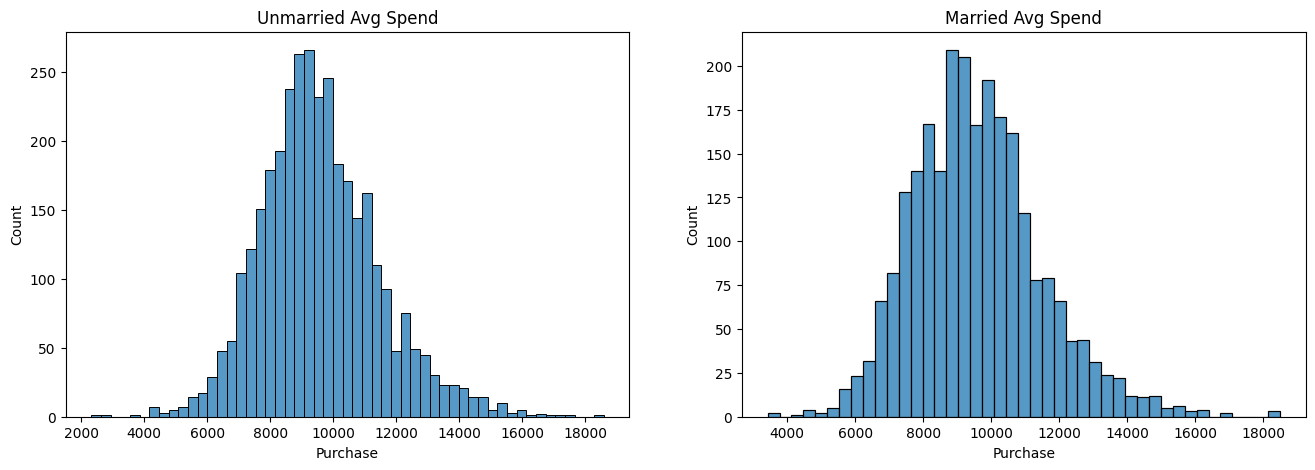

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=avg_amt_Marital_Status_walmart[avg_amt_Marital_Status_walmart['Marital_Status']==0]['Purchase'], ax=axs[0]).set_title("Unmarried Avg Spend")
sns.histplot(data=avg_amt_Marital_Status_walmart[avg_amt_Marital_Status_walmart['Marital_Status']==1]["Purchase"],ax=axs[1]).set_title("Married Avg Spend")

Seperating the data of Married and UnMarried customers

In [49]:
avg_amt_Married =avg_amt_Marital_Status_walmart[avg_amt_Marital_Status_walmart["Marital_Status"]==1]
avg_amt_Unmarried =avg_amt_Marital_Status_walmart[avg_amt_Marital_Status_walmart["Marital_Status"]==0]

In [50]:
sample_size_range = np.arange(1000,3000,500)
num_repitions = 1000

# Loop for varying the sample sizes
for sample_size in sample_size_range:
    print(f'FOR SAMPLE SIZE of {sample_size}', end='\n\n')
    avg_spend_UnMarried=[]
    avg_spend_Married=[]
    for i in range(num_repitions):
        Um = avg_amt_Unmarried.sample(sample_size, replace=True)['Purchase'].mean()
        M = avg_amt_Married.sample(sample_size, replace=True)['Purchase'].mean()
        avg_spend_UnMarried.append(Um)
        avg_spend_Married.append(M)
    
    # Calculating Z values for 90%, 95%, 99% confidence
    z90=(norm.ppf(0.95)-norm.ppf(0.05))/2#90% Confidence Interval
    z95=(norm.ppf(0.975)-norm.ppf(0.025))/2 #95% Confidence Interval
    z99=(norm.ppf(0.995)-norm.ppf(0.005))/2 #99% Confidence Interval

    L = [z90,z95,z99]
    P = [90,95,99]
    k = 0

    for i in L:

        # Sample Means
        sample_mean_UnMarried = np.mean(avg_spend_UnMarried)
        sample_mean_Married = np.mean(avg_spend_Married)

        # Sample Std. deviation
        sample_std_UnMarried = pd.Series(avg_spend_UnMarried).std()
        sample_std_Married = pd.Series(avg_spend_Married).std()

        # Sample Std. Error
        sam_std_error_UnMarried = sample_std_UnMarried/(np.sqrt(sample_size))
        sam_std_error_Married = sample_std_Married/(np.sqrt(sample_size))
        
        # Upper limits of CI
        Upper_lim_UnMarried = sample_mean_UnMarried + i * sam_std_error_UnMarried
        Upper_lim_Married = sample_mean_Married + i * sam_std_error_Married

        # Lower limits of CI
        Lower_lim_UnMarried = sample_mean_UnMarried - i * sam_std_error_UnMarried
        Lower_lim_Married = sample_mean_Married - i * sam_std_error_Married
        
        # CI of Males and Females
        UnMarried_avg_spend_CI = [Lower_lim_UnMarried, Upper_lim_UnMarried]
        Married_avg_spend_CI = [Lower_lim_Married, Upper_lim_Married]

        print(f'{P[k]}% CI', end= '\n\n')
        k=k+1

        print(f"Population avg spend for UnMarried = {avg_amt_Unmarried['Purchase'].mean():.2f}")
        print(f"Population avg spend for Married = {avg_amt_Married['Purchase'].mean():.2f}\n")

        print(f"Sample avg spend of UnMarried = {np.mean(avg_spend_UnMarried):.2f}")
        print(f"Sample avg spend of Married = {np.mean(avg_spend_Married):.2f}\n")

        print(f'Sample standard deviation of the UnMarried avg spend = {sample_std_UnMarried:.2f}')
        print(f'Sample standard deviation of the Married avg spend = {sample_std_Married:.2f}\n')

        print(f'Sample standard error of the UnMarried avg spend = {sam_std_error_UnMarried:.2f}')
        print(f'Sample standard error of the Married avg spend = {sam_std_error_Married:.2f}\n')

        print(f'CI of avg spend for UnMarried = {[float(x) for x in UnMarried_avg_spend_CI]}')
        print(f'CI of avg spend for Married = {[float(x) for x in Male_avg_spend_CI]}', end='\n'*4)
    




    

FOR SAMPLE SIZE of 1000

90% CI

Population avg spend for UnMarried = 9564.41
Population avg spend for Married = 9574.96

Sample avg spend of UnMarried = 9564.41
Sample avg spend of Married = 9575.17

Sample standard deviation of the UnMarried avg spend = 57.88
Sample standard deviation of the Married avg spend = 59.80

Sample standard error of the UnMarried avg spend = 1.83
Sample standard error of the Married avg spend = 1.89

CI of avg spend for UnMarried = [9561.39749797009, 9567.418759513072]
CI of avg spend for Married = [9803.758885104839, 9807.721557484765]



95% CI

Population avg spend for UnMarried = 9564.41
Population avg spend for Married = 9574.96

Sample avg spend of UnMarried = 9564.41
Sample avg spend of Married = 9575.17

Sample standard deviation of the UnMarried avg spend = 57.88
Sample standard deviation of the Married avg spend = 59.80

Sample standard error of the UnMarried avg spend = 1.83
Sample standard error of the Married avg spend = 1.89

CI of avg spend f

#### ##Calculating the CI on Age of the Customers vs Purchase.

In [51]:
avgamt_age = walmart.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avgamt_age = avgamt_age.reset_index()
avgamt_age['Age'].value_counts()

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

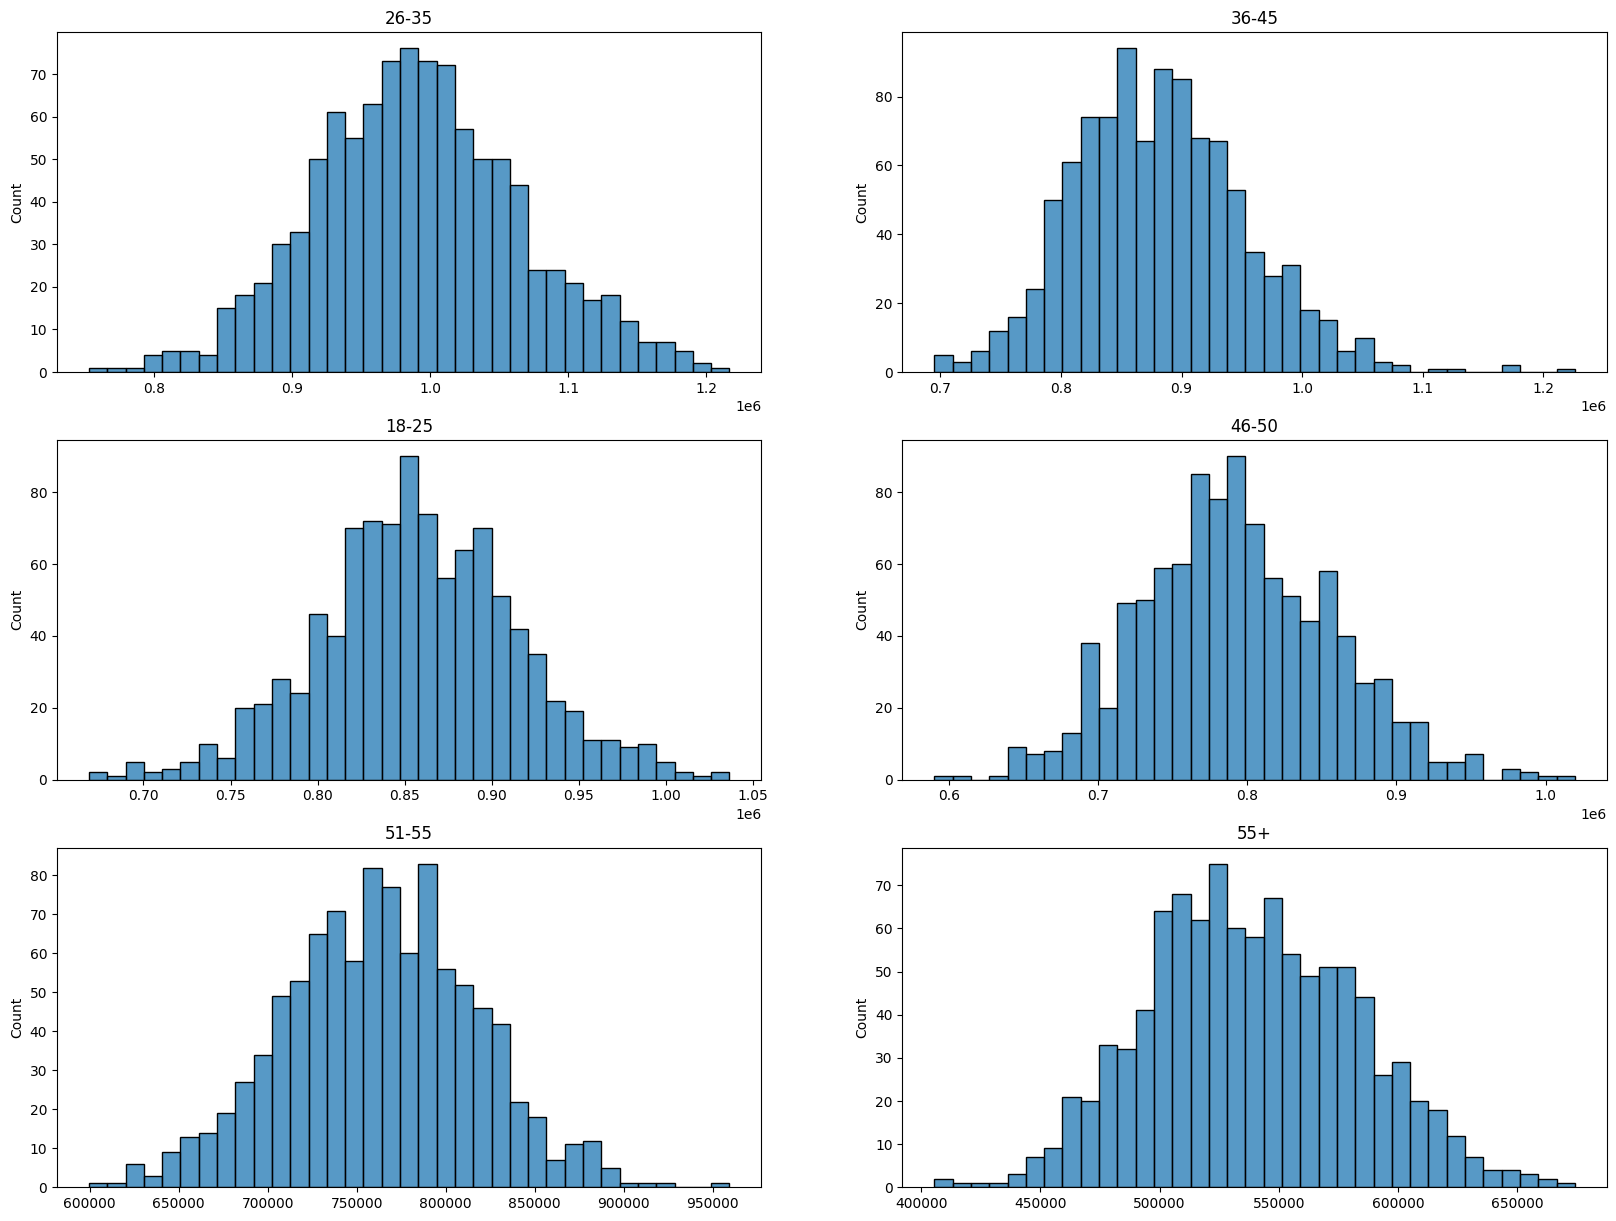

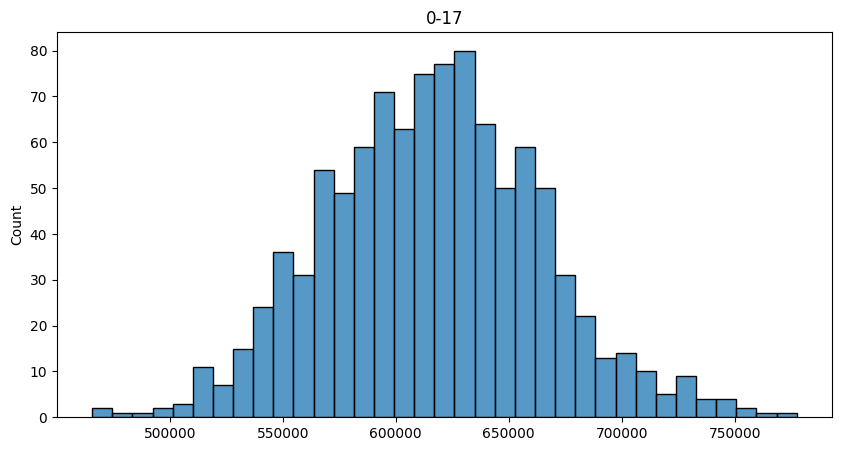

In [ ]:
sample_size = 200
num_repitions = 1000
all_sample_means = {}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

# Calculate sample means for each age interval
for age in age_intervals:  
    all_sample_means[age] = []
    for _ in range(num_repitions):  
        mean = avgamt_age[avgamt_age['Age'] == age].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[age].append(mean)

# Plot histograms for each age interval
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'], bins=35, ax=axis[0, 0]).set(title="26-35")
sns.histplot(all_sample_means['36-45'], bins=35, ax=axis[0, 1]).set(title="36-45")
sns.histplot(all_sample_means['18-25'], bins=35, ax=axis[1, 0]).set(title="18-25")
sns.histplot(all_sample_means['46-50'], bins=35, ax=axis[1, 1]).set(title="46-50")
sns.histplot(all_sample_means['51-55'], bins=35, ax=axis[2, 0]).set(title="51-55")
sns.histplot(all_sample_means['55+'], bins=35, ax=axis[2, 1]).set(title="55+")

plt.show()

# Plot the histogram for '0-17' age group separately
plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'], bins=35).set(title="0-17")
plt.show()


##### ##90% CI

In [68]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000
all_population_means={}
all_sample_means = {}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=avgamt_age[avgamt_age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(float(population_mean))

print("All age group population mean: \n", all_population_means)
print("\n")

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    new_df = avgamt_age[avgamt_age['Age']==val]
    std_error = z90*new_df['Purchase'].std()/np.sqrt(len(new_df))

    sample_mean = new_df['Purchase'].mean()
    
    lower_lim = sample_mean- std_error
    upper_lim = sample_mean + std_error
    
    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (952206.28, 1027112.35)
For age 36-45 confidence interval of means: (832398.89, 926932.53)
For age 18-25 confidence interval of means: (810187.65, 899538.59)
For age 46-50 confidence interval of means: (726209.00, 858888.57)
For age 51-55 confidence interval of means: (703772.36, 822629.48)
For age 55+ confidence interval of means: (487032.92, 592361.57)
For age 0-17 confidence interval of means: (542320.46, 695415.16)


##### ##95% CI

In [69]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000
all_population_means={}
all_sample_means = {}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=avgamt_age[avgamt_age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(float(population_mean))

print("All age group population mean: \n", all_population_means)
print("\n")

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    new_df = avgamt_age[avgamt_age['Age']==val]
    std_error = z95 * new_df['Purchase'].std()/np.sqrt(len(new_df))

    sample_mean = new_df['Purchase'].mean()
    
    lower_lim = sample_mean- std_error
    upper_lim = sample_mean + std_error
    
    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


##### ##99% CI

In [70]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000
all_population_means={}
all_sample_means = {}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=avgamt_age[avgamt_age['Age']==i]['Purchase'].mean()
    all_population_means[i].append(float(population_mean))

print("All age group population mean: \n", all_population_means)
print("\n")

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    new_df = avgamt_age[avgamt_age['Age']==val]
    std_error = z99 * new_df['Purchase'].std()/np.sqrt(len(new_df))

    sample_mean = new_df['Purchase'].mean()
    
    lower_lim = sample_mean- std_error
    upper_lim = sample_mean + std_error
    
    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (931009.46, 1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)


## 7. Recommendations and Action Items

1. **Retain and Attract Male Customers**: 
   - **Insight**: Male customers spend more on average than female customers.
   - **Action**: Increase customer retention efforts for male shoppers by offering loyalty programs or exclusive male-oriented promotions. Develop marketing strategies targeting new male customers through channels likely to reach this demographic. Promote Household & Family-Oriented Products: Highlight promotions on items such as home goods, fashion, beauty products, and children’s items.

2. **Focus on High-Demand Product Categories (1, 5, and 8)**:
   - **Insight**: Categories 1, 5, and 8 have the highest purchase frequency, indicating high demand.
   - **Action**: Prioritize stock availability and promotions for these popular product categories to meet demand and increase sales. Highlight these categories in marketing campaigns.

3. **Acquire More Unmarried Customers**:
   - **Insight**: Unmarried customers show higher spending than married customers.
   - **Action**: Target acquisition efforts toward unmarried customers, possibly through social media channels and ads that emphasize personal enjoyment or lifestyle enhancement.

4. **Prioritize Age Group 26-35 for Acquisition**:
   - **Insight**: Customers aged 26-35 spend more than other age groups.
   - **Action**: Develop targeted advertising and promotions to attract and retain customers in this age group, emphasizing products and services that appeal to their lifestyle.

5. **Emphasize City Categories A and B for Age Group 26-35**:
   - **Insight**: The highest concentration of customers aged 26-35 is in city categories A and B.
   - **Action**: Intensify marketing campaigns and special offers for customers in these cities, leveraging local and digital advertising to maximize reach.

6. **Boost Sales in City Category C for Male Customers**:
   - **Insight**: Male customers in City Category C have higher spending than their counterparts in other cities.
   - **Action**: Expand product offerings and promotions tailored to City Category C, especially targeting male customers with relevant deals.

7. **Reevaluate Low-Performing Product Categories (e.g., 13, 19, 20)**:
   - **Insight**: Product categories 13, 19, and 20 have low purchase frequency.
   - **Action**: Consider reducing stock or discontinuing these low-demand items to reallocate resources to more profitable categories.

8. **Offer Incentives to Top 10 Highest-Spending Users**:
   - **Insight**: A small group of top-spending users drive significant revenue.
   - **Action**: Offer exclusive discounts or personalized offers to these high-value customers to encourage repeat purchases and loyalty.

9. **Engage High-Contributing Occupations with Financial Benefits**:
   - **Insight**: Certain occupations contribute disproportionately to spending.
   - **Action**: Collaborate with financial partners to offer benefits like credit card deals or financing options to customers in high-spending occupations to enhance their purchasing power.

10. **Maintain Quality for Top-Selling Products**:
    - **Insight**: Top products require consistent quality to sustain demand.
    - **Action**: Implement quality control measures and customer feedback loops to ensure high satisfaction with best-selling products, protecting and potentially growing their sales.

11. **Target Mid-Term Residents for Increased Sales**:
    - **Insight**: Customers who have lived in the city for about a year account for 35% of total purchases, indicating active engagement.
    - **Action**: Design campaigns specifically for these mid-term residents, highlighting deals on household or lifestyle products to cater to their likely settling-in phase.

12. **Optimize Promotions for Mid-Range Purchases (5k-10k)**:
    - **Insight**: The most common purchase range is between 5k and 10k.
    - **Action**: Offer value-added promotions for products in this price range, emphasizing quality and affordability to drive higher purchase frequency within this segment.
